### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
pip install qiskit-ibmq-provider

Note: you may need to restart the kernel to use updated packages.


In [2]:
min_qubits=4
max_qubits=13
max_circuits=3
num_shots=1000
skip_qubits=1

backend_id="statevector_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('MY_API_TOKEN')

from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account(token='9f77e2cae821d2b8fbb8aa9555078ce6ae3a9dd373c58b42cdf3faf267e64ae96bdbc3afcf9549fee34e78fb737b35410c1707d5cc0c582be44e8b36801d6dab', overwrite=True)


# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples create a provider instance and get a backend from it

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# Need this path set for imports used below
import sys
sys.path[1:1] = [ "../..", "../../_common" ]


In [3]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


HHL Benchmark Program - Qiskit
... execution starting at Sep 03, 2024 09:40:39 UTC
************
Executing 3 circuits with 4 qubits, using 1 input qubits and 1 clock qubits
************
Executing 3 circuits with 5 qubits, using 1 input qubits and 2 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 76, 0.252
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 114, 0.307, 50.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.002, 0.294, 0.012 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.987, 0.871

************
Executing 3 circuits with 6 qubits, using 1 input qubits and 3 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 148, 0.263
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5 qubit group = 212, 0.317, 100.0
Average Creation, Elapsed,

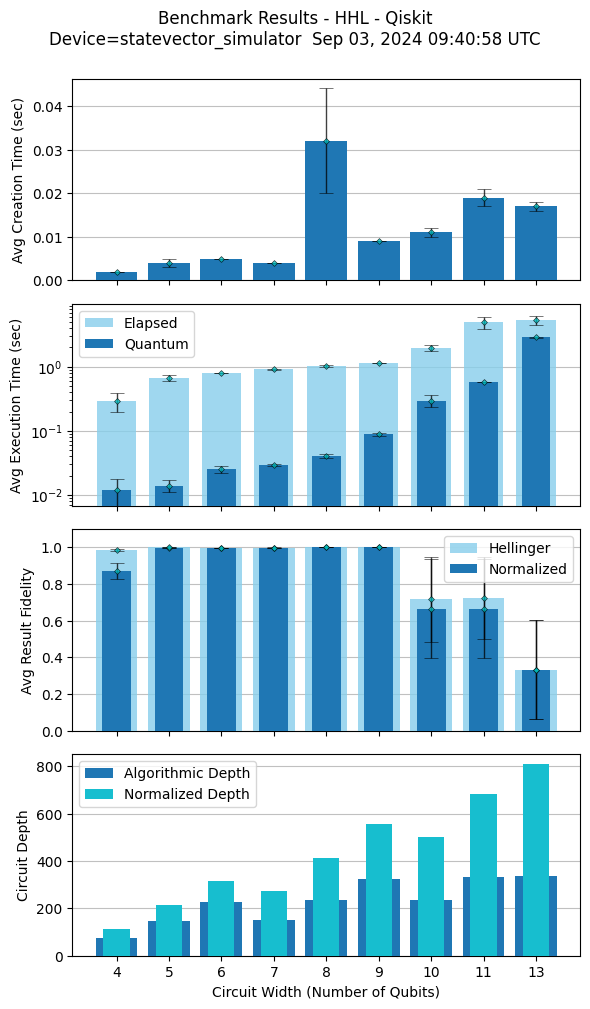

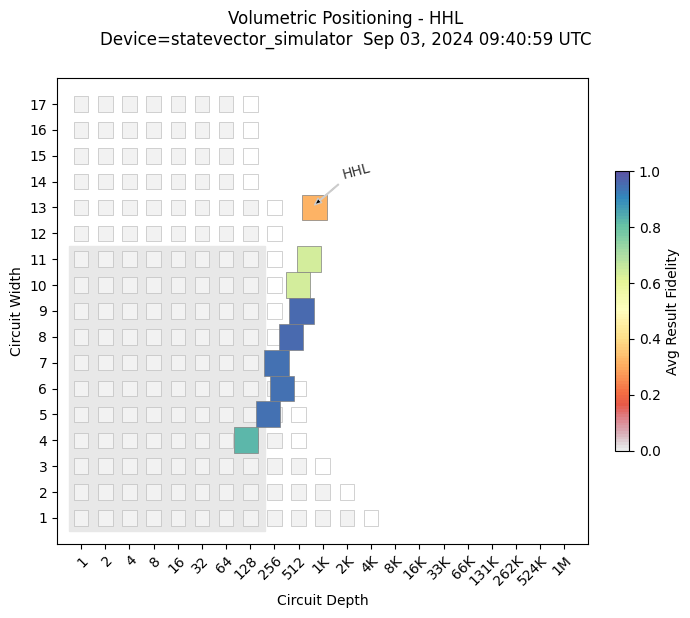

In [4]:
import sys
sys.path.insert(1, "hhl/qiskit-statevector")
import hhl_benchmark

hhl_benchmark.verbose=False

# minimum number of qubits for input and clock registers
hhl_benchmark.min_register_qubits=1

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, 
                skip_qubits=skip_qubits, num_shots=num_shots,
                method=1, use_best_widths=True, min_register_qubits=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

HHL Benchmark Program - Qiskit
... execution starting at Sep 03, 2024 09:40:59 UTC
************
Executing 3 circuits with 5 qubits, using 1 input qubits and 2 clock qubits
************
Executing 3 circuits with 6 qubits, using 1 input qubits and 3 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 148, 0.263
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5 qubit group = 212, 0.317, 100.0
Average Creation, Elapsed, Execution Time for the 5 qubit group = 0.003, 0.385, 0.014 secs
Average Transpiling, Validating, Running Times for group 5 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 5 qubit group = 0.999, 0.993

************
Executing 3 circuits with 7 qubits, using 2 input qubits and 2 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 225, 0.275
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 315, 0.323, 152.0
Average Creation, Elapse

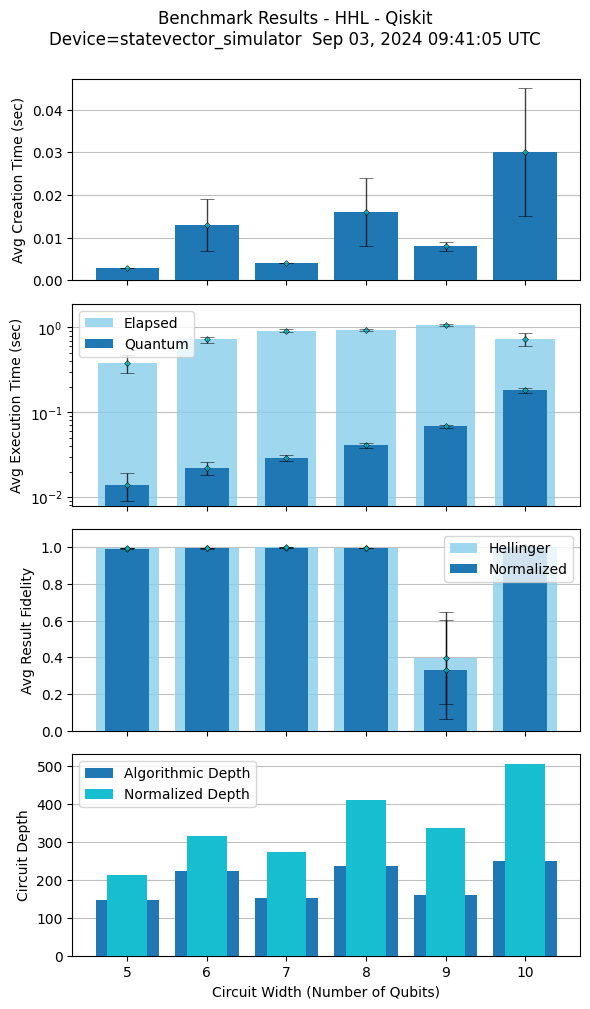

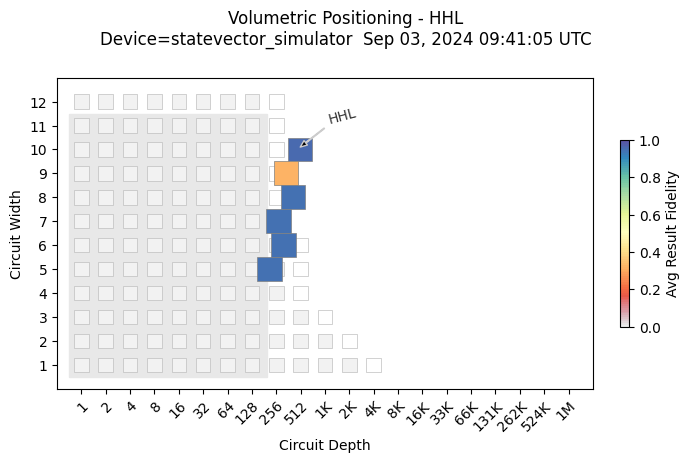

In [5]:
import sys
sys.path.insert(1, "hhl/qiskit-statevector")
import hhl_benchmark

hhl_benchmark.verbose=False

# This run2 method allows you to specify an arbitrary range of input and clock qubit sizes

min_input_qubits=1
max_input_qubits=3
min_clock_qubits=2
max_clock_qubits=3

hhl_benchmark.run2(min_input_qubits=min_input_qubits, max_input_qubits=max_input_qubits,
                 min_clock_qubits=min_clock_qubits, max_clock_qubits=max_clock_qubits,
                 max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

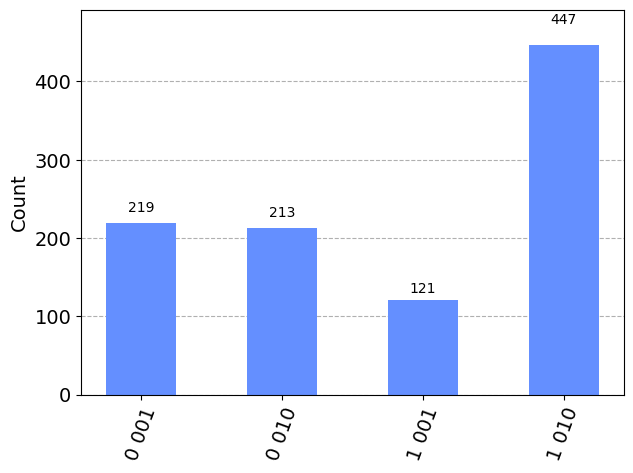

In [6]:
from qiskit.visualization import plot_histogram

# Get the counts, the frequency of each answer
counts = hhl_benchmark.saved_result.get_counts()

# Display the results
plot_histogram(counts)

/home/cdac/anaconda3/envs/qiskit/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


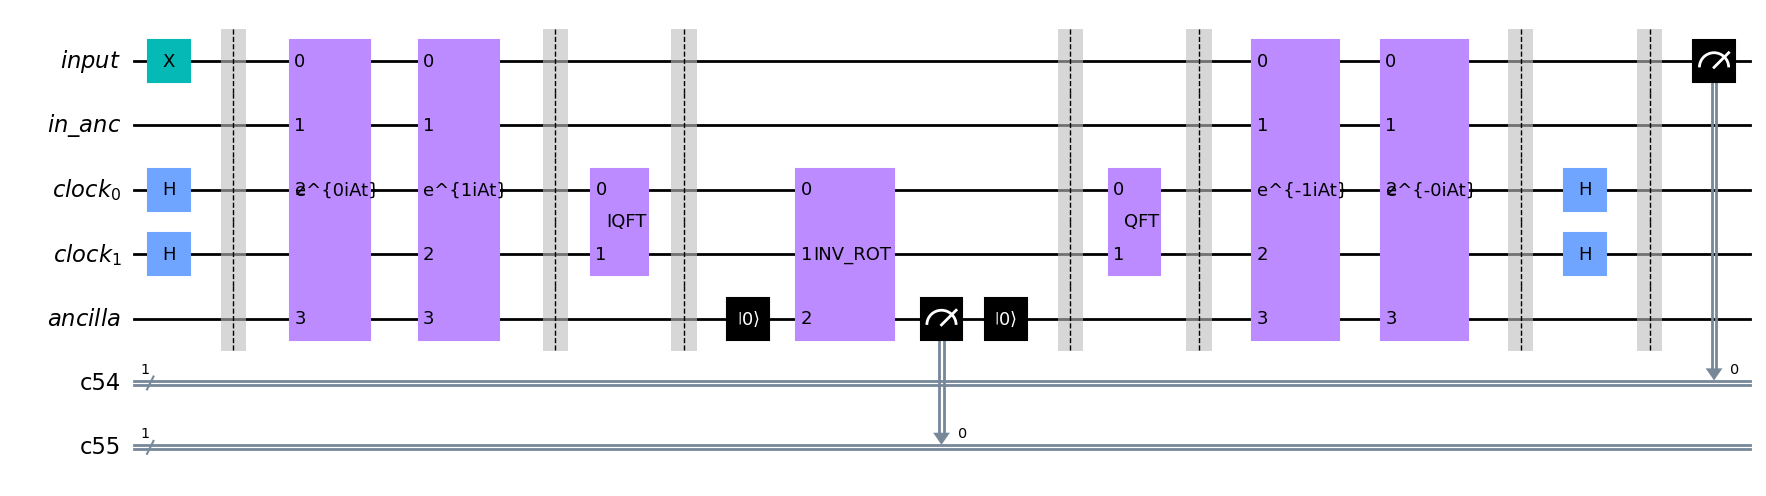

In [7]:
hhl_benchmark.QC_.draw('mpl',scale=1)
#print(circuit)